#  Shading a.k.a. flatfield correction

Fluorescence images acquired with a widefield microscope suffer from uneven illumnation. This is known as shading and the implication is that the observed intensities are distorted, if no correction is applied. The illumination profile can be measured by acquiring an image (under the same conditions as the original data) from a homogeneously fluorescent sample, e.g. a [fluorescent solution](https://calm.ucsf.edu/how-acquire-flat-field-correction-images) or fluorescent slide. This is indicated as the 'flatfield image' here. The flatfield image can be used to correct the original data.
This procedure is known as shading correction or flatfield correction. Below, it is demonstrated with synthetic data how this can be done with Python.

In [1]:
import skimage
import matplotlib.pyplot as plt
from skimage import data
import numpy as np

Check and change working dir:

In [2]:
%pwd

'/Users/joachimgoedhart/surfdrive/Python'

In [3]:
%cd FlatField_data

/Users/joachimgoedhart/surfdrive/Python/FlatField_data


Let's load the images. All of the images are greyscale images with a maximum of 4095 (12bit). There is a flatfield image, an image with objects that needs correction and a background image that can be used to correct the other two images:

In [4]:
img_bg        = skimage.io.imread("Background.tif")
img_flatfield = skimage.io.imread("Flatfield.tif")
img_distorted = skimage.io.imread("Objects-distorted.tif")

In this example, we use a synthetic image with an offset (background) and two types of objects. One type has a high intensity and the other type has a lower intensity. Only objects with either a high or low intensity exist (with a bit of noise).

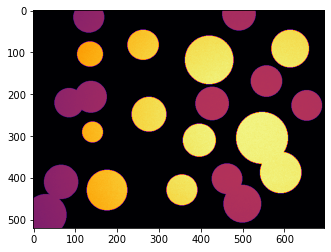

In [5]:
plt.imshow(img_distorted, cmap='inferno')

It is clear that there is some shading as the objects on the left are dimmer (maybe it is better to say that they have a different color, since we use a false colormap).

We can also look at the image that we will use for the correction to get an impression of the uneven illumination:

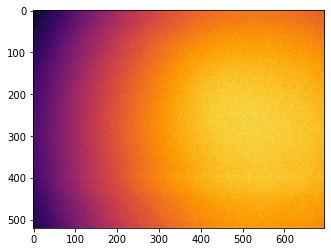

In [6]:
plt.imshow(img_flatfield, cmap='inferno')

The current format of the numbers is an integer that cannot be lower than zero. Since we're subtracting a background, values can go below zero (because of noise). In a later step, we need to divide to images, which needs a float as a result. Therefore, we convert all arrays to a float type:

In [7]:
img_bg        = img_bg.astype(float)
img_flatfield = img_flatfield.astype(float)
img_distorted = img_distorted.astype(float)

Subtract the background from both the object image and flatfield:

In [8]:
img_flatfield_bg = img_flatfield - img_bg
img_distorted_bg = img_distorted - img_bg

Let's see what the maximal value is of the flatfield image. We will use this value later.

In [9]:
max_value = np.amax(img_flatfield_bg)
max_value

1600.0

Let's plot the histogram of the background corrected image. We define 128 bins and stretch between the min and max (4095) of the 12bit image:

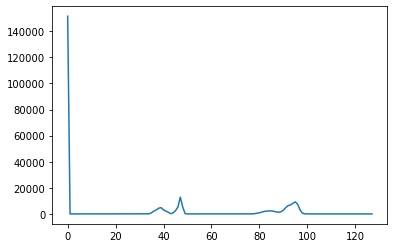

In [10]:
hist, bin = np.histogram(img_distorted_bg,128,[0,4095])
plt.plot(hist)
plt.show()

There are two bumps around 45 and 90. These correspond to objects with different intensity that are also visible in the original image. These bumps are, however, broad due to uneven illumination of the image. Let's do the correction now:

In [11]:
img_corrected = img_distorted_bg / img_flatfield_bg * max_value

Note that we multiply with the maximal value of the flatfield image to obtain an image that can be converted to an image with integers.
An alternative would be to multiply with the average value of the flatfield image. It doesn't really matter since the pixel values are arbitrary units of fluorescence intensity. But it is, of course, important to choose either of the two values for multiplication and stick to that.

In [12]:
img_corrected.shape

(520, 696)

In [13]:
np.amax(img_corrected)

3444.046692607004

The corrected image still has float values for the pixels, and we can convert it back to integers:

In [14]:
img_corrected = img_corrected.astype(np.int16)

Let's have a look at the shading corrected image:

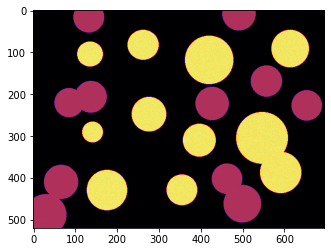

In [15]:
plt.imshow(img_corrected, cmap='inferno')

The corrected image shows only objects with two intensities that are homogeneous over the image. Let's verify this with the histogram:

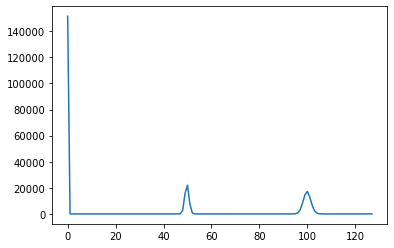

In [16]:
hist, bin = np.histogram(img_corrected,128,[0,4095])
plt.plot(hist)
plt.show()

The histogram now shows two well-defined peaks, indicating succesful shading correction.